--------------------------
Project: FSDS final group work

Group: CheerUp

Tentative title: VACATION HOMES OR CRIME MAGNETS

Due Date: December 19, 2023.

Insights: Aibnb density is connected to higher incidents of (person/property) crime, citing various literatures from cities around the world

Policy recommendation: TBD. Some ideas (NEED LITERATURE TO BACKUP)

If there are relationships

1. Reactive: Increase police presence in areas with high Airbnb density
2. Proactive: Limit Airbnb density in areas with high crime rates of a certain type
3. Collaborative: Airbnb to share data with local police departments to help them identify areas with high Airbnb density
4. Punitive: Airbnb to pay a fine for every crime incident that occurs in areas with high Airbnb density
5. Preventive: Airbnb to pay for additional security cameras in areas with high Airbnb density 

If not: Other cities this but London doesn't see the same issue. Should look at improving crime by improving other aspects...

--------------------------

### Data loading and cleaning (if necessary)



Task 0a: Set up libraries and function

In [3]:
# Load all libraries [To implement TRY EXCEPT]

import os
from requests import get
from urllib.parse import urlparse
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Function to download files from remote
def cache_data(src:str, dest:str) -> str:
    """
    Create a folder to store file from URL.
    If folder doesn't already exists, then create one, before writing the file.

    src : URL
    dest : location on local drive
    
    """    
    url = urlparse(src) # We assume that this is some kind of valid URL 
    fn  = os.path.split(url.path)[-1] # Extract the filename
    dfn = os.path.join(dest,fn) #Destination filename as path
    
    if not os.path.isfile(dfn):
        
        print(f"{dfn} not found, downloading!")

        path = os.path.split(dest)
        
        if len(path) >= 1 and path[0] != '':
            os.makedirs(os.path.join(*path), exist_ok=True)
            
        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)
            
        print("\tDone downloading...")

    else:
        print(f"Found {dfn} locally!")

    return dfn

Task 0b: Load in CSV files and spatial objects

In [5]:
# Define paths
ddir  = os.path.join('data','geo') # destination directory
spath = 'https://github.com/jreades/i2p/blob/master/data/src/' # source path
spath_db = 'https://www.dropbox.com/scl/fi/' # source path for dropbox

In [7]:
# Read in airbnb, crime, and lsoa stats files. https://www.dropbox.com/home/casa/casa_fsds_cheers. 
# These files have been cleaned, cropped, turned into gdf and hosted on dropbox to save time later on.
# See cleandata.ipynb in the Github repo for more details on how these files were created.
# # [PATIENCE] Takes about 7-8 minutes to download and read in the data

# Crime data filtered for September 2023, within Greater London
crime = gpd.read_file(cache_data(spath_db + 'ewc9skqcfr930whzcjadd/crime.gpkg?rlkey=xjve2mmmmt5h3allsa2zpabya&dl=1', ddir),driver='gpkg',low_memory=False)

# Airbnb listing data scraped on September 2023, filtered within Greater London
listings = gpd.read_file(cache_data(spath_db + 's1nisliy5tof1fpb7vx4w/listings.gpkg?rlkey=gxb97iasj68mfy2jgzbiw0tgp&dl=1', ddir),driver='gpkg' ,low_memory=False)

# LSOA (London) data concatenated from multiple datasets from London Datastore,
lsoa_stat = pd.read_csv(cache_data(spath_db + '8zc0g09rlf1yhj6j7yn6n/lsoa_full.csv?rlkey=yopr4hv017rr3iv4e2zus0ifz&dl=1', ddir), low_memory=False)

Found data/geo/crime.gpkg locally!
Found data/geo/listings.gpkg locally!


In [ ]:
# Read in shapefiles (2 mins)
water = gpd.read_file(cache_data(spath+'Water.gpkg?raw=true', ddir))
green = gpd.read_file(cache_data(spath+'Greenspace.gpkg?raw=true', ddir))
boros = gpd.read_file(cache_data(spath+'Boroughs.gpkg?raw=true', ddir))
lsoa = gpd.read_file(cache_data(spath_db+'u367zlorie8vuluugy2fr/lsoa_london.gpkg?rlkey=rc7rdnlfdmzfgy5q7ujz9pnwj&dl=1', ddir))
print('Done.')

Found data/geo/Water.gpkg locally!
Found data/geo/Greenspace.gpkg locally!
Found data/geo/Boroughs.gpkg locally!
Found data/geo/lsoa_london.gpkg locally!
Done.


Task 0c: Transformation + trim data to Greater London's confines

In [ ]:
#Check CRS for all geo dataframes
print(water.crs, green.crs, boros.crs, lsoa.crs, crime.crs, listings.crs)
# All dataframes are in EPSG:27700

EPSG:27700 EPSG:27700 EPSG:27700 EPSG:27700 EPSG:27700 EPSG:27700


(155000.0, 202000.0)

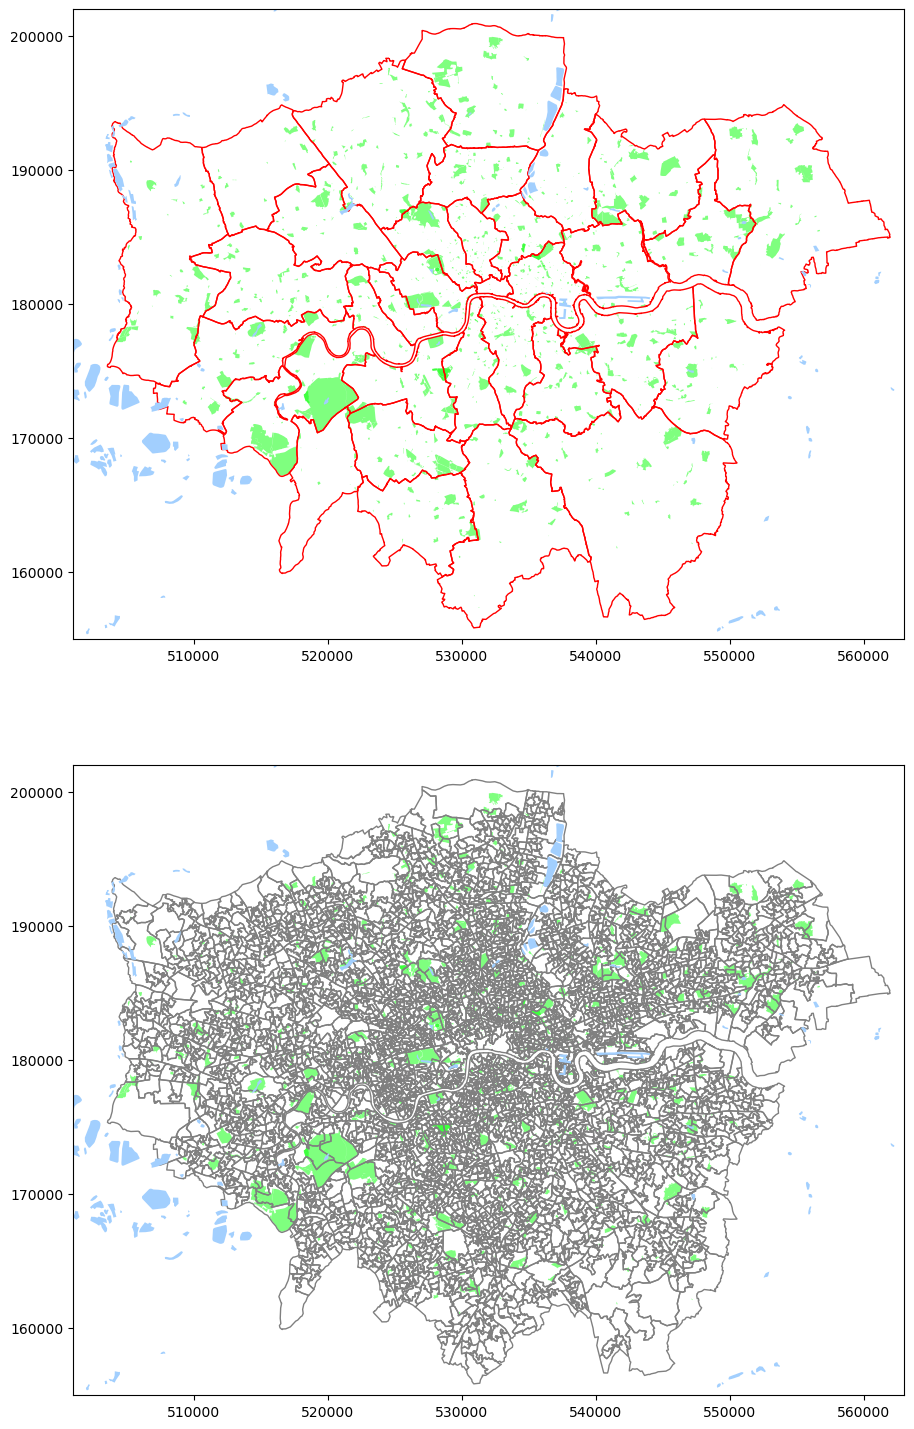

In [9]:
# Plot London map to confirm geometries are correct
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(24,18))

green.plot(edgecolor=None, facecolor=(0,1,0,0.5), ax=ax1)
boros.plot(edgecolor='red', facecolor='None',ax=ax1)
water.plot(edgecolor=None,facecolor='#a2cffe',ax=ax1)

green.plot(edgecolor=None, facecolor=(0,1,0,0.5), ax=ax2)
lsoa.plot(edgecolor='grey', facecolor='None',ax=ax2)
water.plot(edgecolor=None, facecolor='#a2cffe',ax=ax2)

# Set the x and y limits
ax1.set_xlim([501000, 563000])
ax1.set_ylim([155000, 202000])
ax2.set_xlim([501000, 563000])
ax2.set_ylim([155000, 202000])

Text(0.5, 1.0, 'Crimes in London, Sep 2023, Metropolitan Police')

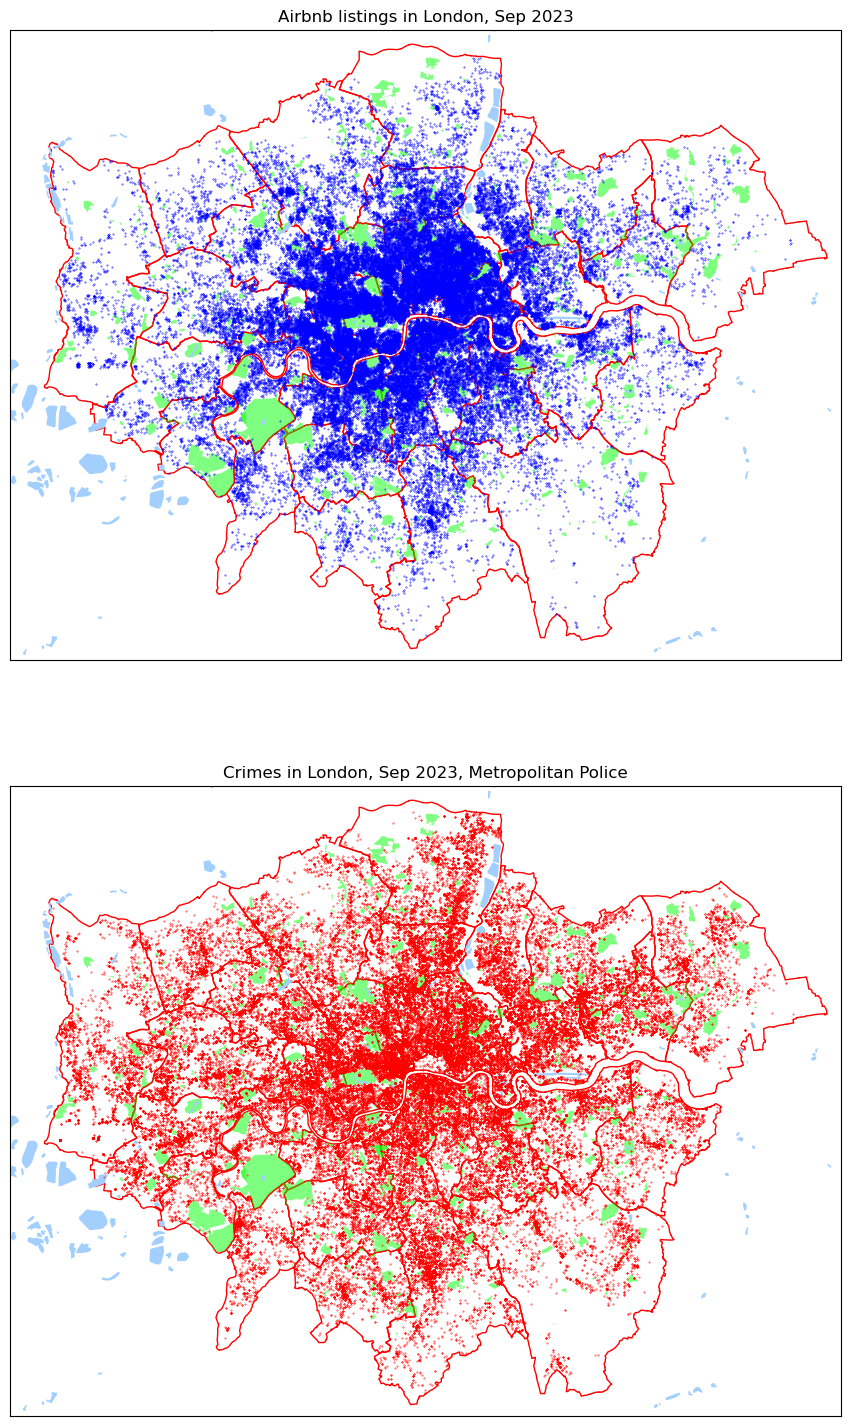

In [10]:
# Plot airbnb listings and crime incidents
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(24,18))

# Set the x and y limits
for ax in fig.get_axes():
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.set_xlim([501000, 563000])
    ax.set_ylim([155000, 202000])
    boros.plot(edgecolor='red', facecolor='None',ax=ax)
    green.plot(edgecolor=None, facecolor=(0,1,0,0.5), ax=ax)
    water.plot(edgecolor=None,facecolor='#a2cffe',ax=ax)

listings.plot(ax=ax1, markersize=0.1,facecolor='blue')  
ax1.set_title('Airbnb listings in London, Sep 2023')

crime.plot(ax=ax2, markersize=0.1,facecolor='red')
ax2.set_title('Crimes in London, Sep 2023, Metropolitan Police')



In [ ]:
# Clean crime data: outliers, and missing values, split into 2 types by severity
# crime_serious = ['Burglary', 'Criminal damage and arson', 'Violence and sexual offences', 'Robbery', 'Theft from the person','Possession of weapons']
# crime_minor = ['Anti-social behaviour', 'Public order', 'Vehicle crime', 'Drugs' , 'Shoplifting', 'Bicycle theft'] 
crime_sub = ['Burglary','Robbery','Theft from the person', 'Bicycle theft','Anti-social behaviour', 'Public order','Drugs']
# Need rationalization when writing the report

# Omit rows with Other Crime and Other Theft
crime = crime[~crime['Crime type'].isin(['Other theft','Other crime'])]
# Create a new column for crime type
# crime['Severity'] = np.where(crime['Crime type'].isin(crime_serious), 'Serious', 'Minor')
crime['Tourism-relevance'] = np.where(crime['Crime type'].isin(crime_sub), 'Relevant', 'Less relevant')
crime.tail()

# Histogram of crime 
fig, ax = plt.subplots(figsize=(12,6))
crime['Tourism-relevance'].value_counts().plot(kind='bar', ax=ax)
ax.set_title('Number of crimes by type')
ax.set_ylabel('Number of crimes')
ax.set_xlabel('Crime type')
plt.show()


['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']


/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

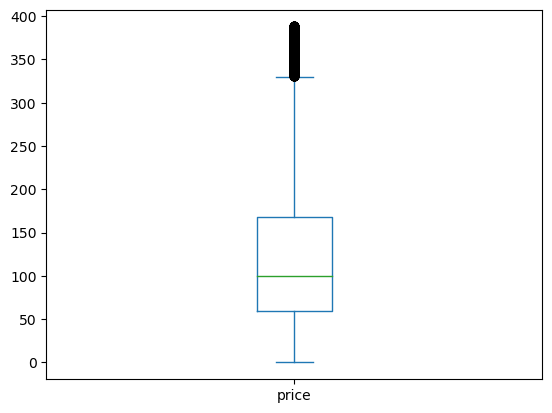

In [ ]:
# Clean listings data: outliers, and missing values, split into 3 types by property type
print(listings.room_type.unique())
# Omit rows with Hotel room
listings = listings[~listings['room_type'].isin(['Hotel room'])]

# Transform price to float
if listings.price.dtype == 'O':
    listings.price = listings.price.str.replace('$','').str.replace(',','').astype(float).round(2)

# Trim outliers in terms of price based on interquartile range, because they are most likely they are not real listings
q1 = listings.price.quantile(0.25)
q3 = listings.price.quantile(0.75)
iqr = q3 - q1
listings = listings[(listings.price >= q1 - 1.5*iqr) & (listings.price <= q3 + 1.5*iqr)]
listings.price.plot.box()

### Descriptive statistics (Question #6 - 18 points)

*Objective:* 
Show the clustering of airbnb (by type), and crime incidents (by type). Show possible correlations between airbnb density and crime incidents
Approach: 

1. Split airbnb listing by 3 types (entire house/private room/shared room), and crime by 2 types (person vs property)
2. Plot out all the airbnb listings.
     - Heat map (KDE for each)
     - Descriptive statistics for each (LSOA min, max, mean, median)
3. Plot all the crime incidents, split by .
    - Heat map (KDE for each)
    - Descriptive statistics for each (LSOA min, max, mean, median)
4. Visual observation based on the heatmaps above where airbnb listings and crimes seem to overlap
5. Run correlations
-------------------------------------------------------------------------------

Task 1: Produce heat map for each type of airbnb listings

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

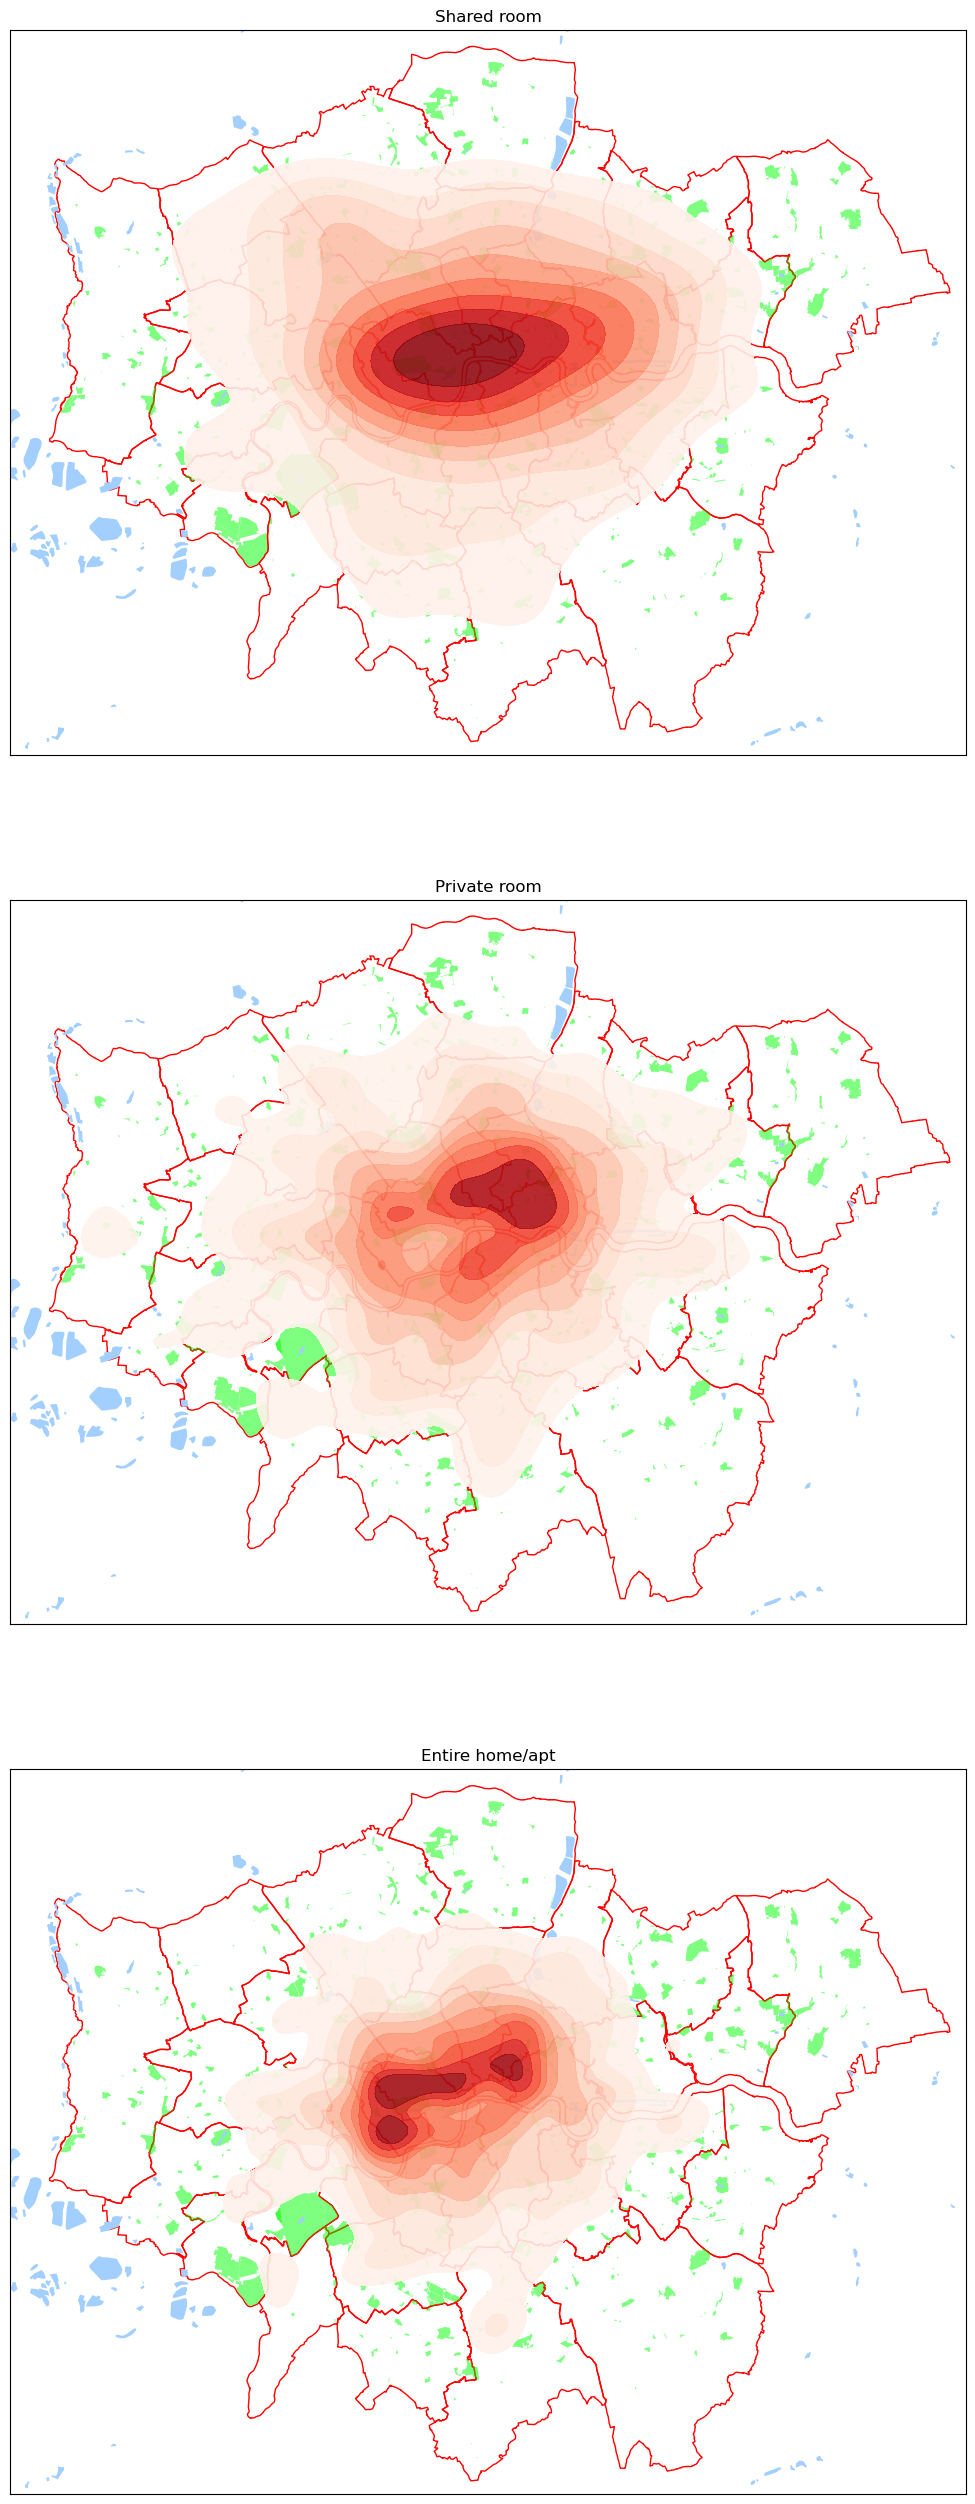

In [ ]:
# kernel density estimation plot of listings for each room type on a map
# ['Private room' 'Entire home/apt' 'Shared room']

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(48,32))


for ax in fig.get_axes():
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.set_xlim([501000, 563000])
    ax.set_ylim([155000, 202000])
    boros.plot(edgecolor='red', facecolor='None',ax=ax)
    green.plot(edgecolor=None, facecolor=(0,1,0,0.5), ax=ax)
    water.plot(edgecolor=None,facecolor='#a2cffe',ax=ax)


# Create thresholds
levels = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
# Kernel Density Estimation

kde = sns.kdeplot(
    ax=ax1,
    x=listings[listings.room_type=='Shared room'].geometry.x,
    y=listings[listings.room_type=='Shared room'].geometry.y,
    levels = levels, fill=True, cmap='Reds', alpha=0.9
)

kde = sns.kdeplot(
    ax=ax2,
    x=listings[listings.room_type=='Private room'].geometry.x,
    y=listings[listings.room_type=='Private room'].geometry.y,
    levels = levels, fill=True, cmap='Reds', alpha=0.9
)

kde = sns.kdeplot(
    ax=ax3,
    x=listings[listings.room_type=='Entire home/apt'].geometry.x,
    y=listings[listings.room_type=='Entire home/apt'].geometry.y,
    levels = levels, fill=True, cmap='Reds', alpha=0.9
)

ax1.set_title('Shared room')
ax2.set_title('Private room')
ax3.set_title('Entire home/apt')

plt.show()


Task 2: Produce heat map for each type of crime

In [ ]:
# # kernel density estimation plot of crime for each type on a map
# # Takes 2 minutes to run
# # ['Serious' 'Minor']

# fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(60,32))

# for ax in fig.get_axes():
#     ax.axes.xaxis.set_visible(False)
#     ax.axes.yaxis.set_visible(False)
#     ax.set_xlim([501000, 563000])
#     ax.set_ylim([155000, 202000])
#     boros.plot(edgecolor='red', facecolor='None',ax=ax)
#     green.plot(edgecolor=None, facecolor=(0,1,0,0.5), ax=ax)
#     water.plot(edgecolor=None,facecolor='#a2cffe',ax=ax)

# # Create thresholds
# levels = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
# # Kernel Density Estimation

# kde = sns.kdeplot(
#     ax=ax1,
#     x=crime[crime['Severity']=='Serious'].geometry.x,
#     y=crime[crime['Severity']=='Serious'].geometry.y,
#     levels = levels, fill=True, cmap='Reds', alpha=0.9
# )

# kde = sns.kdeplot(
#     ax=ax2,
#     x=crime[crime['Severity']=='Minor'].geometry.x,
#     y=crime[crime['Severity']=='Minor'].geometry.y,
#     levels = levels, fill=True, cmap='Reds', alpha=0.9
# )

# kde = sns.kdeplot(
#     ax=ax3,
#     x=crime[crime['Tourism-relevance']=='Relevant'].geometry.x,
#     y=crime[crime['Tourism-relevance']=='Relevant'].geometry.y,
#     levels = levels, fill=True, cmap='Reds', alpha=0.9
# )

# for ax in (ax1,ax2,ax3):
#     kde = sns.kdeplot(
#     ax=anext,
#     x=crime[crime['Tourism-relevance']=='Relevant'].geometry.x,
#     y=crime[crime['Tourism-relevance']=='Relevant'].geometry.y,
#     levels = levels, fill=True, cmap='Blue', alpha=0.9
# )


# ax1.set_title('Serious incidents')
# ax2.set_title('Minor incidents')
# ax3.set_title('Crime relevant to tourism')


# plt.show()



In [ ]:
# # kernel density estimation plot of crime for each type on a map
# # Takes 2 minutes to run
# # ['Serious' 'Minor']

# fig, ax = plt.subplots(figsize=(32,32))

# ax.axes.xaxis.set_visible(False)
# ax.axes.yaxis.set_visible(False)
# ax.set_xlim([501000, 563000])
# ax.set_ylim([155000, 202000])
# boros.plot(edgecolor='red', facecolor='None',ax=ax)
# green.plot(edgecolor=None, facecolor=(0,1,0,0.5), ax=ax)
# water.plot(edgecolor=None,facecolor='#a2cffe',ax=ax)

# # Create thresholds
# levels = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
# # Kernel Density Estimation

# kde = sns.kdeplot(
#     ax=ax,
#     x=crime[crime['Tourism-relevance']=='Relevant'].geometry.x,
#     y=crime[crime['Tourism-relevance']=='Relevant'].geometry.y,
#     levels = levels, fill=True, cmap='Reds', alpha=0.9
# )


# ax.set_title('Crime relevant to tourism')


# plt.show()


Task 3: Run correlations + spatial autocorrelation

In [ ]:
lsoa_merge = lsoa

# Spatial crime and lsoa, summarise by count
sjoin_lsoa = gpd.sjoin(crime, lsoa_merge)
count_dict = sjoin_lsoa['LSOA21CD'].value_counts().to_dict() # count the values with value counts
lsoa_merge['crime_count'] = lsoa_merge['LSOA21CD'].map(count_dict) # map it back to lsoa

In [ ]:
# # Spatial join listings and lsoa, summarise by count
# sjoin_lsoa = gpd.sjoin(listings, lsoa_merge)
# count_dict = sjoin_lsoa['LSOA21CD'].value_counts().to_dict() # count the values with value counts
# lsoa_merge['listing_count'] = lsoa_merge['LSOA21CD'].map(count_dict) # map it back to lsoa

In [ ]:
# Spatial join crime by severity and lsoa, summarise by count
# for s in ['Serious','Minor']:
#     sjoin_lsoa = gpd.sjoin(crime[crime['Severity']==s], lsoa_merge)
#     count_dict = sjoin_lsoa['LSOA21CD'].value_counts().to_dict() # count the values with value counts
#     lsoa_merge['crime_count_'+s] = lsoa_merge['LSOA21CD'].map(count_dict) # map it back to lsoa_merge

# Spatial join crime and lsoa, summarise by count
for s in ['Relevant']:
    sjoin_lsoa = gpd.sjoin(crime[crime['Tourism-relevance']==s], lsoa_merge)
    count_dict = sjoin_lsoa['LSOA21CD'].value_counts().to_dict() # count the values with value counts
    lsoa_merge['crime_count_'+s] = lsoa_merge['LSOA21CD'].map(count_dict) # map it back to lsoa_merge

# Sptial join listings by room type and lsoa, summarise by count
for r in ['Shared room','Private room','Entire home/apt']:
    sjoin_lsoa = gpd.sjoin(listings[listings['room_type']==r], lsoa_merge)
    count_dict = sjoin_lsoa['LSOA21CD'].value_counts().to_dict() # count the values with value counts
    lsoa_merge['listing_count_'+r] = lsoa_merge['LSOA21CD'].map(count_dict) # map it back to lsoa_merge

In [ ]:
# Change NA to 0
lsoa_merge = lsoa_merge.fillna(0)
lsoa_merge.head()

OBJECTID   LSOA21CD                   LSOA21NM  \
0         1  E01000001        City of London 001A   
1         2  E01000002        City of London 001B   
2         3  E01000003        City of London 001C   
3         4  E01000005        City of London 001E   
4         5  E01000006  Barking and Dagenham 016A   

                               GlobalID  \
0  f1865556-4e62-48e3-a025-d93a40f15e46   
1  83e78aad-ee05-44a5-a8d3-077de6ed4053   
2  69c457df-229e-4446-9577-95ac1c9be694   
3  d537d59f-237a-45ed-a514-b0ab2a93e510   
4  8d0081fe-69e2-48ac-aaf9-fd270d60e339   

                                            geometry  crime_count  \
0  POLYGON ((532105.312 182010.574, 532162.491 18...          0.0   
1  POLYGON ((532634.497 181926.016, 532619.141 18...          2.0   
2  POLYGON ((532135.138 182198.131, 532158.250 18...          1.0   
3  POLYGON ((533808.018 180767.774, 533649.037 18...         14.0   
4  POLYGON ((545122.049 184314.931, 545271.849 18...          3.0   

   listing_count  crime_count_Serious  crime_count_Minor  \
0           16.0                  0.0                0.0   
1           14.0                  1.0                1.0   
2           16.0                  1.0                0.0   
3           99.0                  5.0                9.0   
4            7.0                  1.0                2.0   

   crime_count_Relevant  listing_count_Shared room  \
0                   0.0                        1.0   
1                   2.0                        0.0   
2                   0.0                        0.0   
3                   7.0                        0.0   
4                   1.0                        0.0   

   listing_count_Private room  listing_count_Entire home/apt  
0                         5.0                           10.0  
1                         0.0                           14.0  
2                         4.0                           12.0  
3                        20.0                           79.0  
4                         6.0                            1.0

Text(0.5, 1.0, 'Airbnb Listing count by LSOA, Sep 2023')

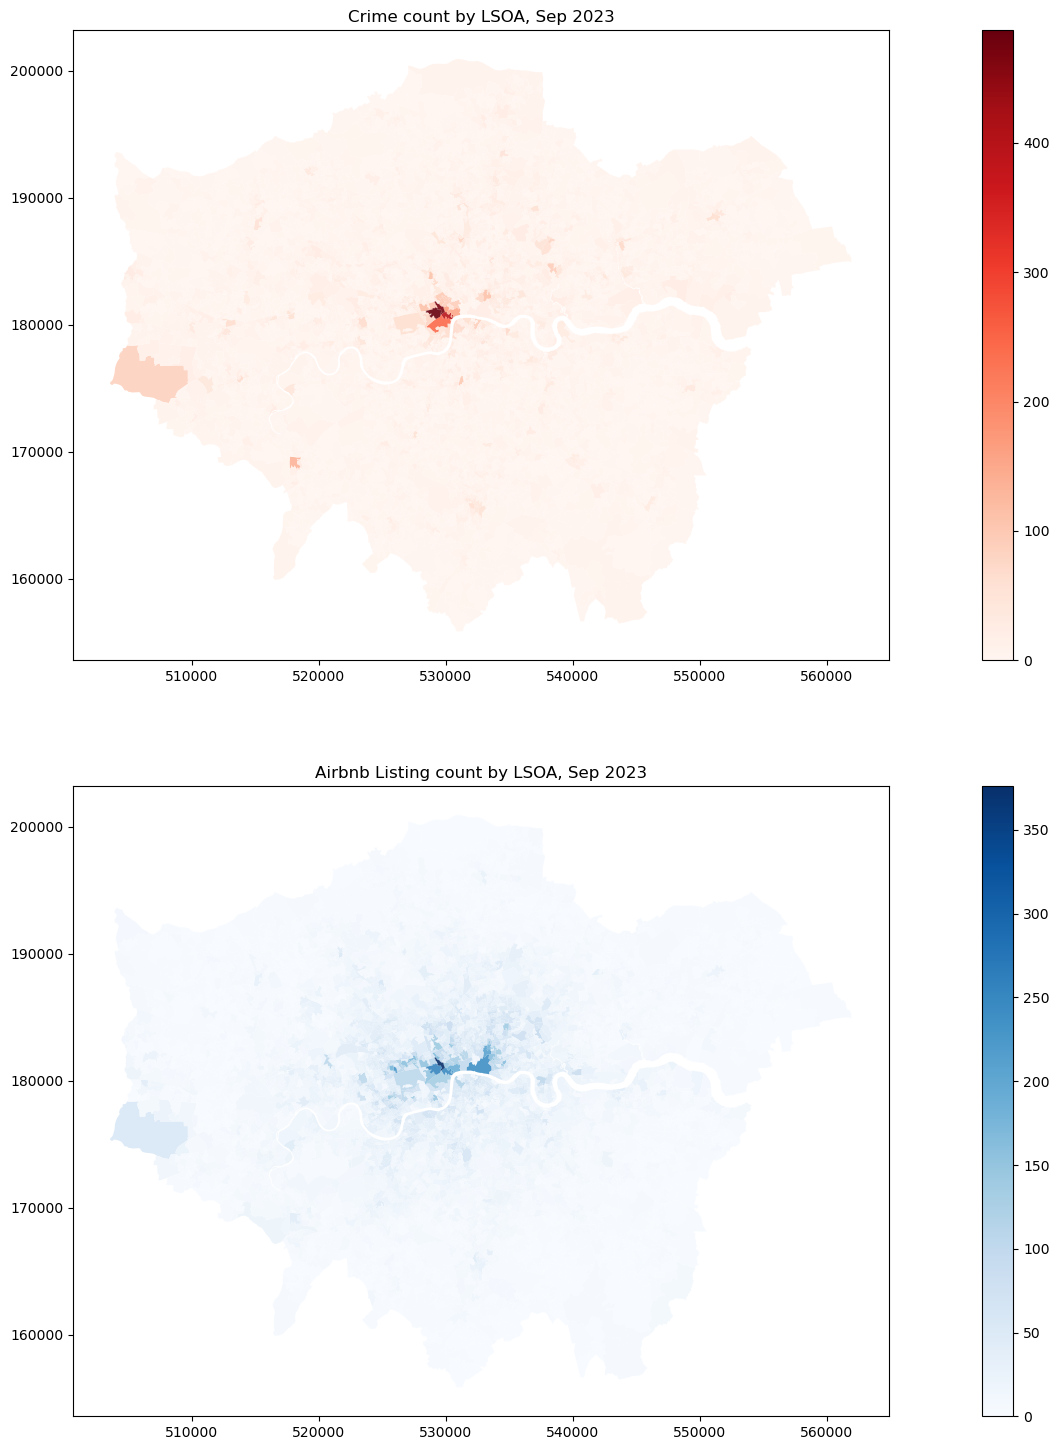

In [37]:
# Plot crime on x and listings y for lsoa_merge
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(24,18))
lsoa_merge.plot(ax=ax1, column='crime_count_Relevant', legend=True, cmap='Reds', alpha=0.9)
lsoa_merge.plot(ax=ax2, column='listing_count', legend=True, cmap='Blues', alpha=0.9)
ax1.set_title('Crime count by LSOA, Sep 2023')
ax2.set_title('Airbnb Listing count by LSOA, Sep 2023')


In [38]:
# # Plot 2 crime types LSOA
# fig, (ax1,ax2) = plt.subplots(2,1, figsize=(24,18))

# lsoa_merge.plot(ax=ax1, column='crime_count_Serious', legend=True, cmap='Reds', alpha=0.9)
# lsoa_merge.plot(ax=ax2, column='crime_count_Minor', legend=True, cmap='Reds', alpha=0.9)

# ax1.set_title('Serious crime count by LSOA, Jul-Sep 2023')
# ax2.set_title('Minor crime count by LSOA, Jul-Sep 2023')

# plt.show()

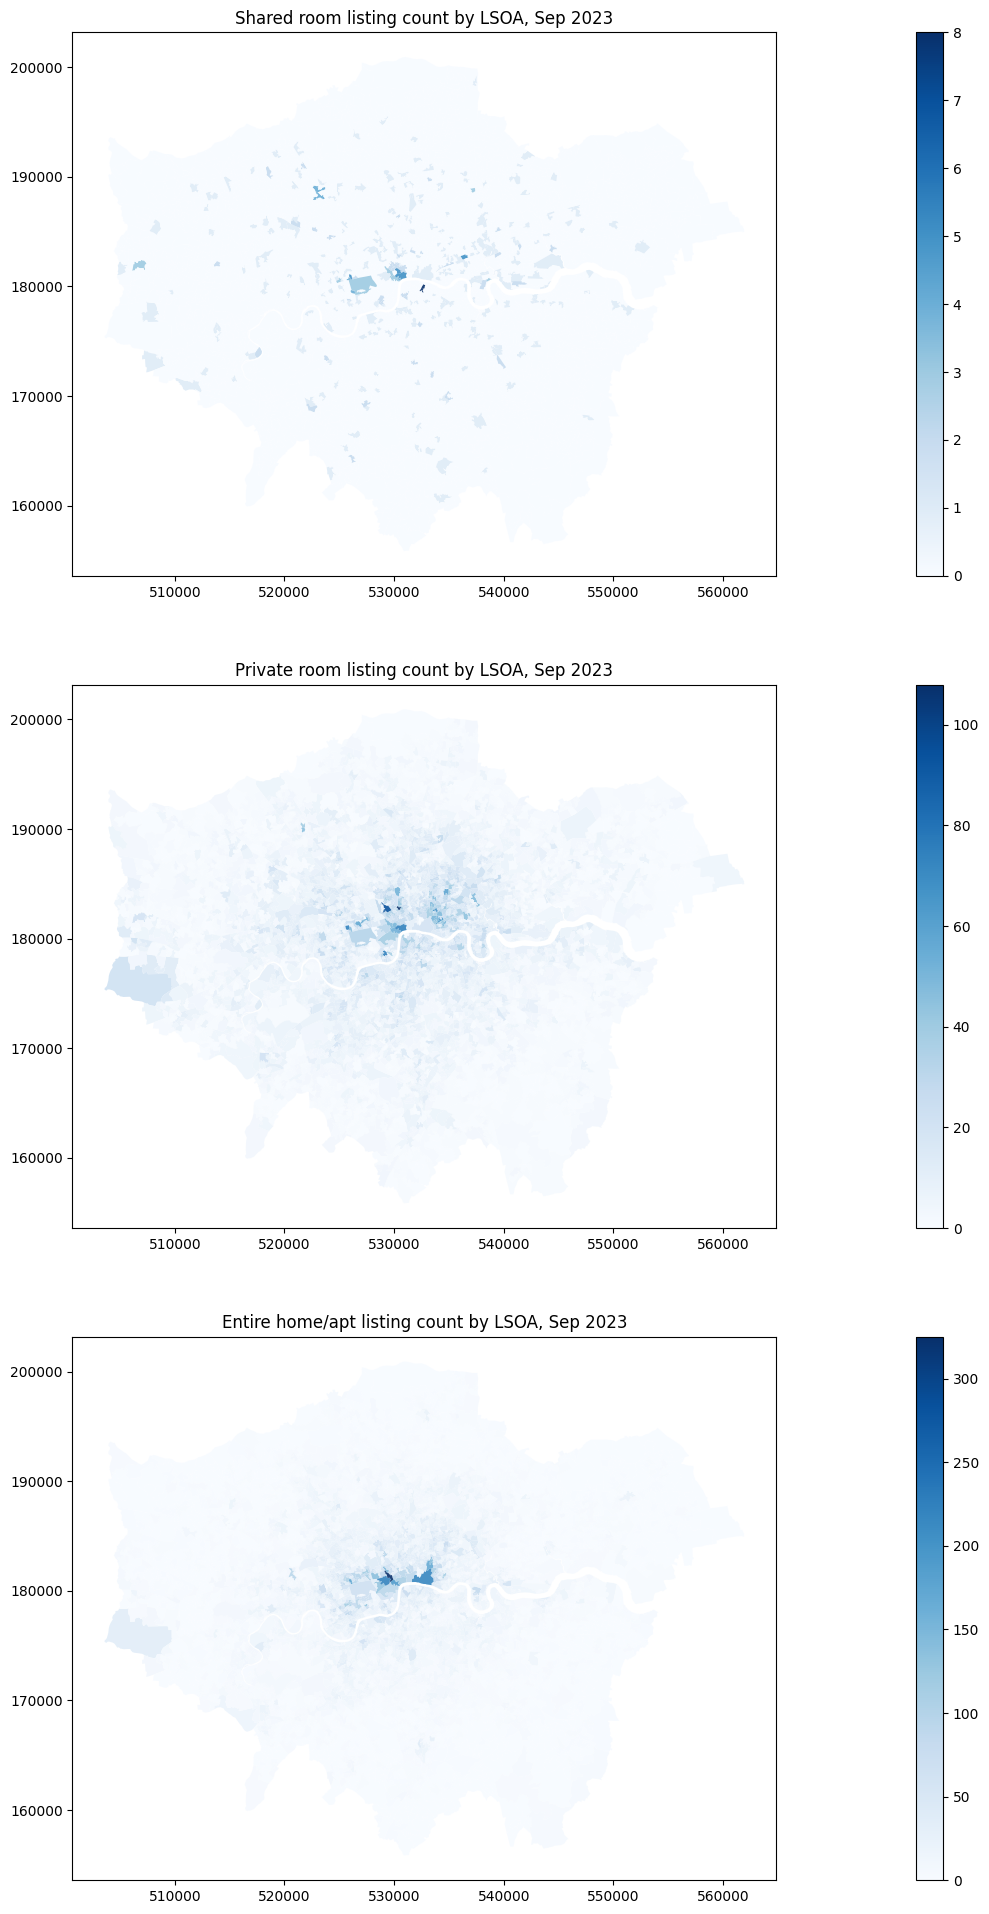

In [34]:
# Plot 3 listing types by LSOA
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(36,24))

lsoa_merge.plot(ax=ax1, column='listing_count_Shared room', legend=True, cmap='Blues', alpha=0.9)
lsoa_merge.plot(ax=ax2, column='listing_count_Private room', legend=True, cmap='Blues', alpha=0.9)
lsoa_merge.plot(ax=ax3, column='listing_count_Entire home/apt', legend=True, cmap='Blues', alpha=0.9)


ax1.set_title('Shared room listing count by LSOA, Sep 2023')
ax2.set_title('Private room listing count by LSOA, Sep 2023')
ax3.set_title('Entire home/apt listing count by LSOA, Sep 2023')

plt.show()

Text(0.5, 1.0, 'Correlation Matrix - Listings type vs Crime severity')

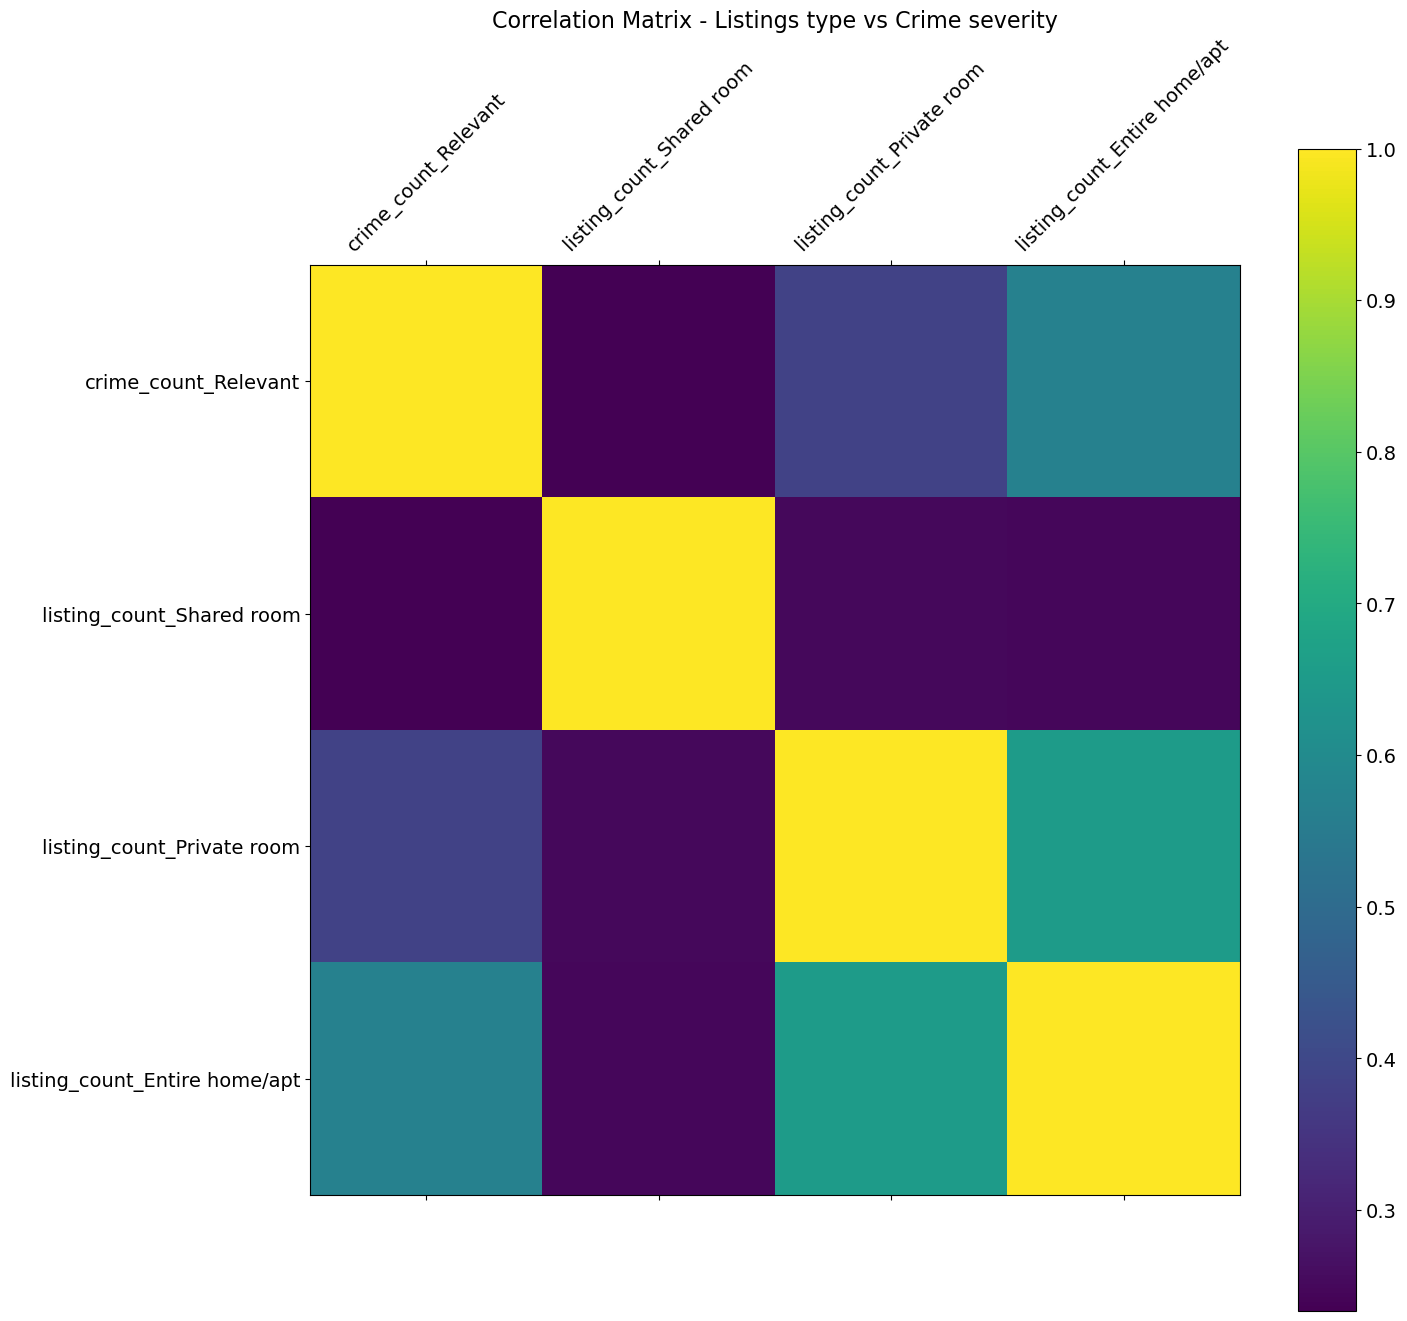

In [41]:
# Correlation matrix

# Subset last 5 columns
lsoa_merge_sub = lsoa_merge.iloc[:,-4:]

f = plt.figure(figsize=(15, 15)) # creates a new figure, sets length and width

plt.matshow(lsoa_merge_sub.corr(numeric_only=True), fignum=f.number) # matshow - creates matrix plot
plt.xticks(range(lsoa_merge_sub.select_dtypes(['number']).shape[1]), lsoa_merge_sub.select_dtypes(['number']).columns, fontsize=14, rotation=45) # add the x axis label
plt.yticks(range(lsoa_merge_sub.select_dtypes(['number']).shape[1]), lsoa_merge_sub.select_dtypes(['number']).columns, fontsize=14) # add the y axis label

# select_dtypes(['number']) - choose the numeric variables
cb = plt.colorbar() # add a legend to the right hand (default position)
cb.ax.tick_params(labelsize=14) # label size
plt.title('Correlation Matrix - Listings type vs Crime severity', fontsize=16) # add the title


Entire home/apt has the highest correl to Crime (relevant to tourism), followed by Private room and Shared room

In [42]:
lsoa_stat.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 235 columns):
 #    Column                                                                           Dtype 
---   ------                                                                           ----- 
 0    LSOA code                                                                        object
 1    local authority code                                                             object
 2    local authority name                                                             object
 3    All households                                                                   int64 
 4    Detached                                                                         int64 
 5    Semi-detached                                                                    int64 
 6    Terraced                                                                         int64 
 7    Purpose built flat                      

Chosen columns:
X
- Population density: Usual resident (11) / Area (need to get)
- Bad+Very Bad Health (120+121) / Pop (11)
- deprived 2+ dimension (144+145+146) / Pop (11)
- Unemployed (72) / Pop (11)
- Young people (17+18+19) / Pop (11)
- 3x Airbnb listings (3 types) / Household number (3)
Y
- Crime-relevant / Pop (11)

In [15]:
lsoa_merge.head()

OBJECTID   LSOA21CD                   LSOA21NM  \
0         1  E01000001        City of London 001A   
1         2  E01000002        City of London 001B   
2         3  E01000003        City of London 001C   
3         4  E01000005        City of London 001E   
4         5  E01000006  Barking and Dagenham 016A   

                               GlobalID  \
0  f1865556-4e62-48e3-a025-d93a40f15e46   
1  83e78aad-ee05-44a5-a8d3-077de6ed4053   
2  69c457df-229e-4446-9577-95ac1c9be694   
3  d537d59f-237a-45ed-a514-b0ab2a93e510   
4  8d0081fe-69e2-48ac-aaf9-fd270d60e339   

                                            geometry  crime_count  \
0  POLYGON ((532105.312 182010.574, 532162.491 18...          0.0   
1  POLYGON ((532634.497 181926.016, 532619.141 18...          2.0   
2  POLYGON ((532135.138 182198.131, 532158.250 18...          1.0   
3  POLYGON ((533808.018 180767.774, 533649.037 18...         14.0   
4  POLYGON ((545122.049 184314.931, 545271.849 18...          3.0   

   listing_count  crime_count_Serious  crime_count_Minor  \
0           16.0                  0.0                0.0   
1           14.0                  1.0                1.0   
2           16.0                  1.0                0.0   
3           99.0                  5.0                9.0   
4            7.0                  1.0                2.0   

   listing_count_Shared room  listing_count_Private room  \
0                        1.0                         5.0   
1                        0.0                         0.0   
2                        0.0                         4.0   
3                        0.0                        20.0   
4                        0.0                         6.0   

   listing_count_Entire home/apt  
0                           10.0  
1                           14.0  
2                           12.0  
3                           79.0  
4                            1.0

In [73]:
# Merge column 'All usual residents' from lsoa_stat to lsoa_merge by LSOA21CD
lsoa_merge1 = lsoa_merge.merge(lsoa_stat[['LSOA code','All usual residents']], left_on = 'LSOA21CD',right_on='LSOA code', how='left').drop(columns=['LSOA code'])

# Add density for each column in lsoa_merge using 'All usual residents' in lsoa_stat
lsoa_merge1['crime_density'] = lsoa_merge1['crime_count']/lsoa_merge1['All usual residents']
lsoa_merge1['listing_density'] = lsoa_merge1['listing_count']/lsoa_merge1['All usual residents']
lsoa_merge1['crime_density_Serious'] = lsoa_merge1['crime_count_Serious']/lsoa_merge1['All usual residents']
lsoa_merge1['crime_density_Minor'] = lsoa_merge1['crime_count_Minor']/lsoa_merge1['All usual residents']
lsoa_merge1['listing_density_Shared room'] = lsoa_merge1['listing_count_Shared room']/lsoa_merge1['All usual residents']
lsoa_merge1['listing_density_Private room'] = lsoa_merge1['listing_count_Private room']/lsoa_merge1['All usual residents']
lsoa_merge1['listing_density_Entire home/apt'] = lsoa_merge1['listing_count_Entire home/apt']/lsoa_merge1['All usual residents']

# Drop columns 
lsoa_merge1.head()

OBJECTID   LSOA21CD                   LSOA21NM  \
0         1  E01000001        City of London 001A   
1         2  E01000002        City of London 001B   
2         3  E01000003        City of London 001C   
3         4  E01000005        City of London 001E   
4         5  E01000006  Barking and Dagenham 016A   

                               GlobalID  \
0  f1865556-4e62-48e3-a025-d93a40f15e46   
1  83e78aad-ee05-44a5-a8d3-077de6ed4053   
2  69c457df-229e-4446-9577-95ac1c9be694   
3  d537d59f-237a-45ed-a514-b0ab2a93e510   
4  8d0081fe-69e2-48ac-aaf9-fd270d60e339   

                                            geometry  crime_count  \
0  POLYGON ((532105.312 182010.574, 532162.491 18...          0.0   
1  POLYGON ((532634.497 181926.016, 532619.141 18...          2.0   
2  POLYGON ((532135.138 182198.131, 532158.250 18...          1.0   
3  POLYGON ((533808.018 180767.774, 533649.037 18...         14.0   
4  POLYGON ((545122.049 184314.931, 545271.849 18...          3.0   

   listing_count  crime_count_Serious  crime_count_Minor  \
0           16.0                  0.0                0.0   
1           14.0                  1.0                1.0   
2           16.0                  1.0                0.0   
3           99.0                  5.0                9.0   
4            7.0                  1.0                2.0   

   listing_count_Shared room  listing_count_Private room  \
0                        1.0                         5.0   
1                        0.0                         0.0   
2                        0.0                         4.0   
3                        0.0                        20.0   
4                        0.0                         6.0   

   listing_count_Entire home/apt  All usual residents  crime_density  \
0                           10.0                 1473       0.000000   
1                           14.0                 1382       0.001447   
2                           12.0                 1613       0.000620   
3                           79.0                 1111       0.012601   
4                            1.0                 1840       0.001630   

   listing_density  crime_density_Serious  crime_density_Minor  \
0         0.010862               0.000000             0.000000   
1         0.010130               0.000724             0.000724   
2         0.009919               0.000620             0.000000   
3         0.089109               0.004500             0.008101   
4         0.003804               0.000543             0.001087   

   listing_density_Shared room  listing_density_Private room  \
0                     0.000679                      0.003394   
1                     0.000000                      0.000000   
2                     0.000000                      0.002480   
3                     0.000000                      0.018002   
4                     0.000000                      0.003261   

   listing_density_Entire home/apt  
0                         0.006789  
1                         0.010130  
2                         0.007440  
3                         0.071107  
4                         0.000543

In [17]:
lsoa_merge1.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   OBJECTID                         4994 non-null   int64   
 1   LSOA21CD                         4994 non-null   object  
 2   LSOA21NM                         4994 non-null   object  
 3   GlobalID                         4994 non-null   object  
 4   geometry                         4994 non-null   geometry
 5   crime_count                      4994 non-null   float64 
 6   listing_count                    4994 non-null   float64 
 7   crime_count_Serious              4994 non-null   float64 
 8   crime_count_Minor                4994 non-null   float64 
 9   listing_count_Shared room        4994 non-null   float64 
 10  listing_count_Private room       4994 non-null   float64 
 11  listing_count_Entire home/apt    4994 non-null   float64 
 12

Text(0.5, 1.0, 'Airbnb Listing density by LSOA, Sep 2023')

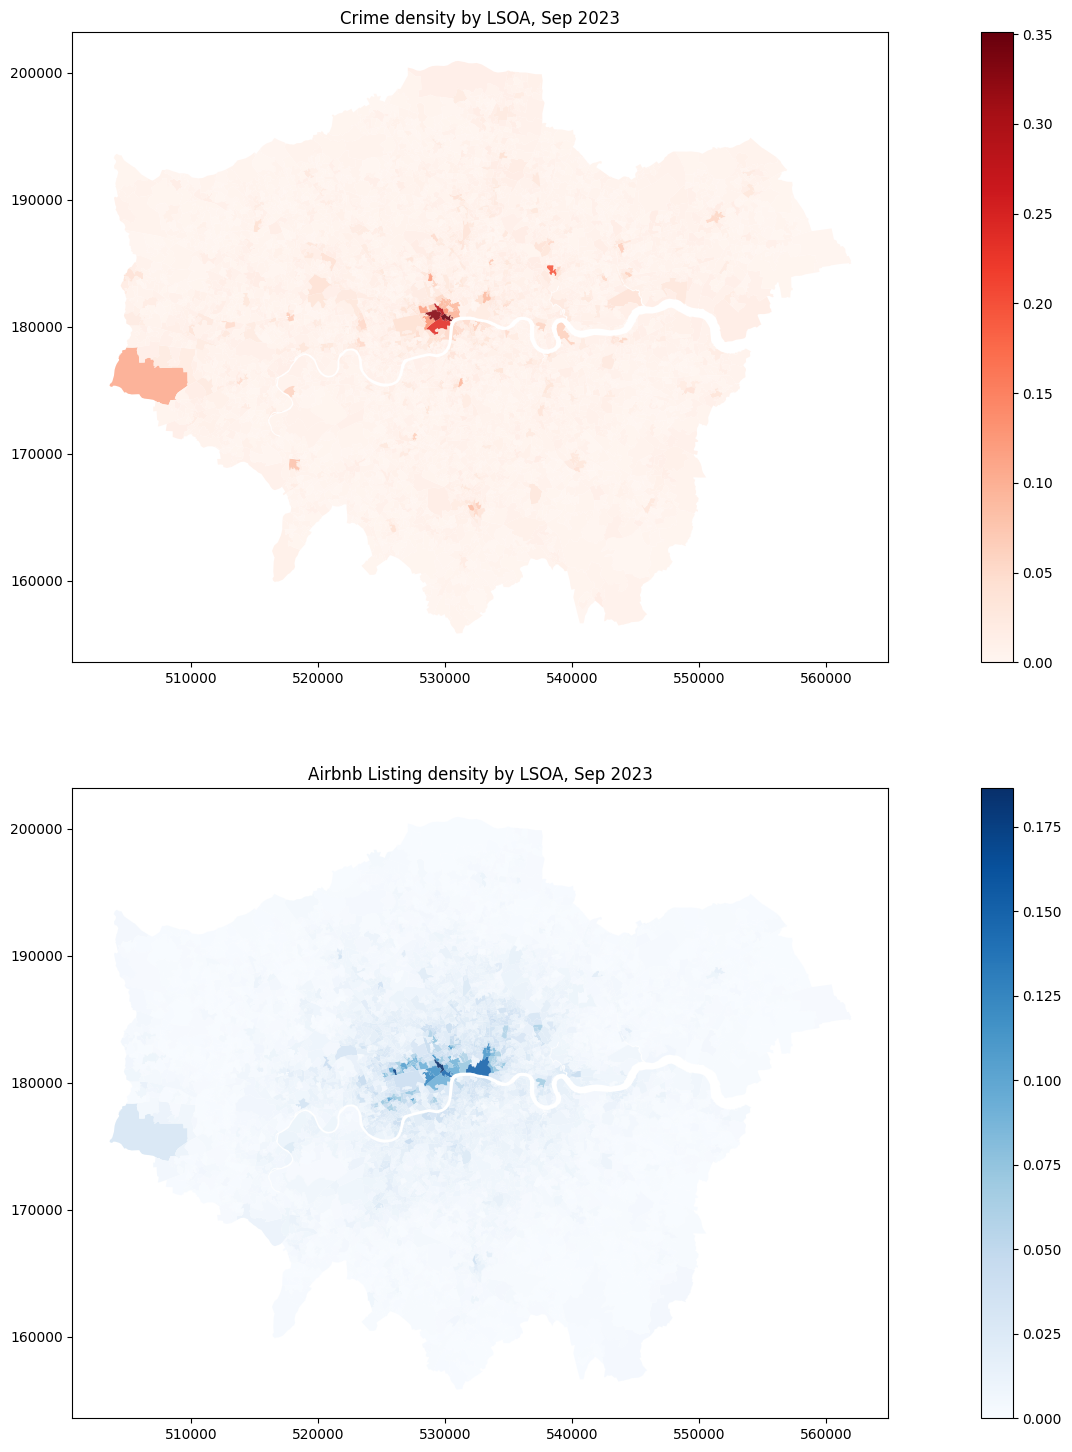

In [50]:
# Plot crime density on x and listings density y for lsoa_merge1
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(24,18))
lsoa_merge1.plot(ax=ax1, column='crime_density', legend=True, cmap='Reds', alpha=0.9)
lsoa_merge1.plot(ax=ax2, column='listing_density', legend=True, cmap='Blues', alpha=0.9)
ax1.set_title('Crime density by LSOA, Sep 2023')
ax2.set_title('Airbnb Listing density by LSOA, Sep 2023')

Text(0.5, 1.0, 'Correlation Matrix - Listings type vs Crime severity density')

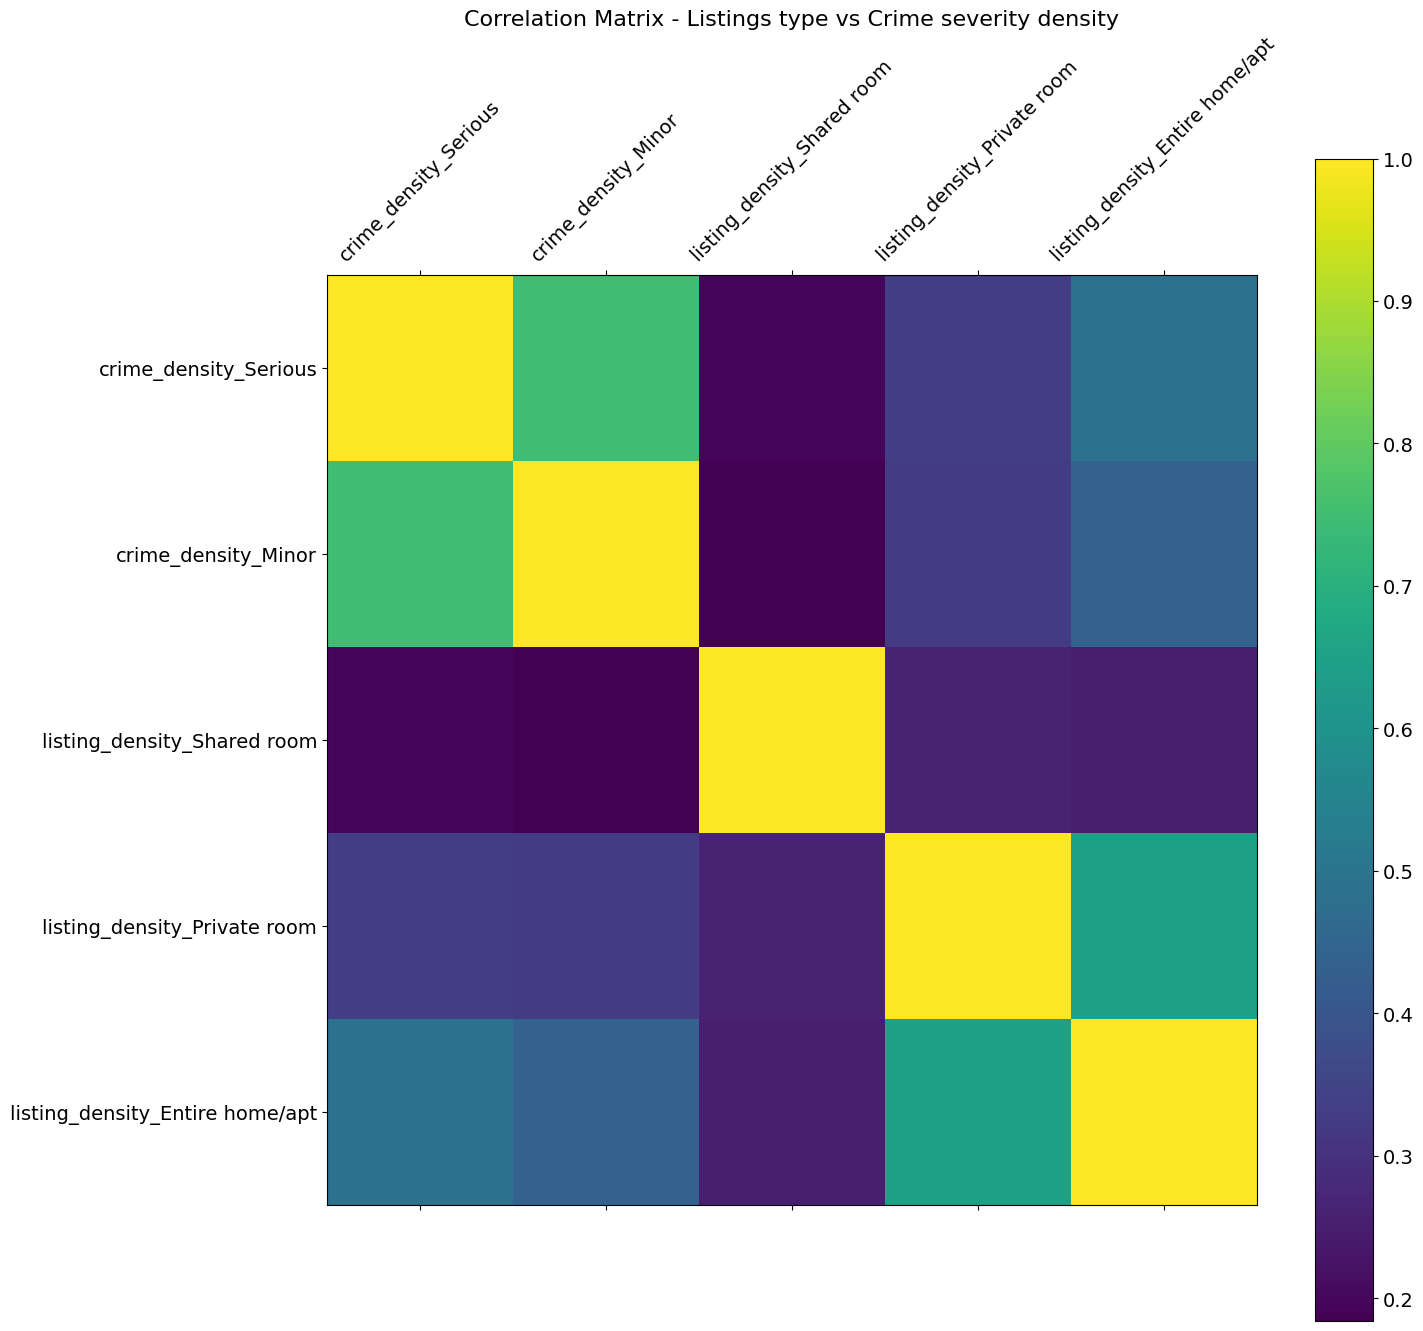

In [18]:
# Correlation matrix - Density
# Subset last 5 columns
lsoa_merge1_sub = lsoa_merge1.iloc[:,-5:]

f = plt.figure(figsize=(15, 15)) # creates a new figure, sets length and width

plt.matshow(lsoa_merge1_sub.corr(numeric_only=True), fignum=f.number) # matshow - creates matrix plot
plt.xticks(range(lsoa_merge1_sub.select_dtypes(['number']).shape[1]), lsoa_merge1_sub.select_dtypes(['number']).columns, fontsize=14, rotation=45) # add the x axis label
plt.yticks(range(lsoa_merge1_sub.select_dtypes(['number']).shape[1]), lsoa_merge1_sub.select_dtypes(['number']).columns, fontsize=14) # add the y axis label

# select_dtypes(['number']) - choose the numeric variables
cb = plt.colorbar() # add a legend to the right hand (default position)
cb.ax.tick_params(labelsize=14) # label size
plt.title('Correlation Matrix - Listings type vs Crime severity density', fontsize=16) # add the title

In [19]:
# Spatial aucorrelation with Local Moran's I
from libpysal.weights.contiguity import Queen
from libpysal import examples
import splot

y = lsoa_merge1['crime_density'].values
w = Queen.from_dataframe(lsoa_merge1)
w.transform = 'r'

C:\Users\17197\AppData\Local\Temp\ipykernel_22656\1382231159.py:7: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(lsoa_merge1)


In [ ]:
from esda.moran import Moran
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

moran = Moran(y, w)
moran.I
moran.p_sim

0.001

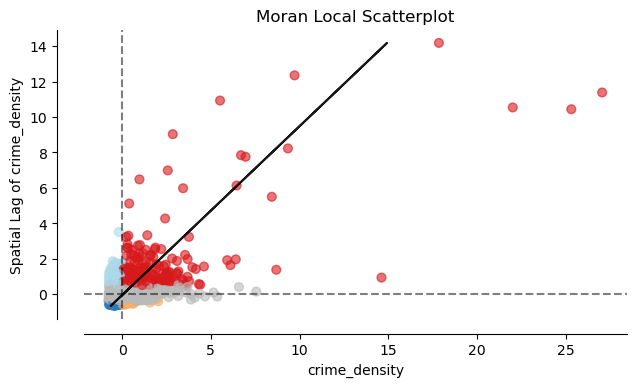

In [ ]:
moran_loc = Moran_Local(y, w)
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('crime_density')
ax.set_ylabel('Spatial Lag of crime_density')
plt.show()

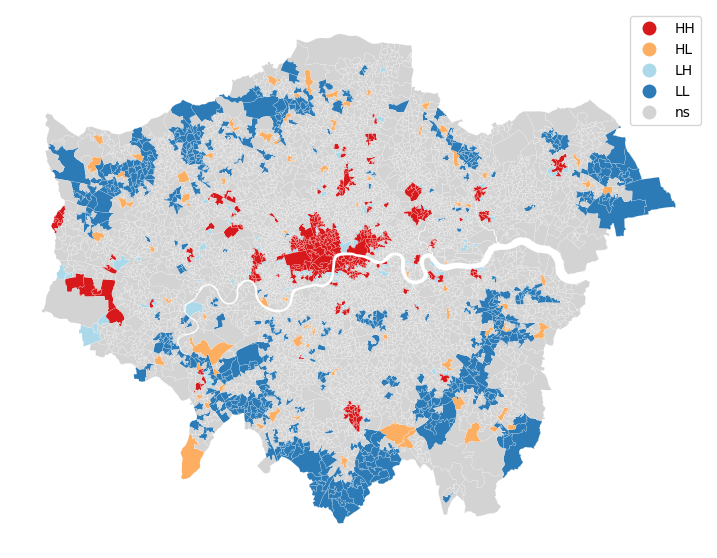

In [ ]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, lsoa_merge1, p=0.05, figsize = (9,9))
plt.show()

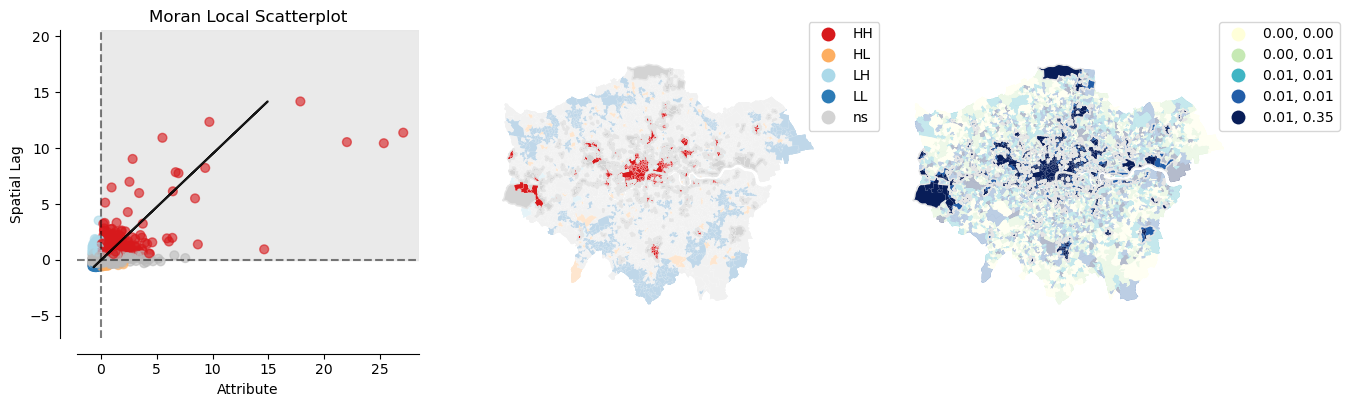

In [ ]:
from splot.esda import plot_local_autocorrelation

plot_local_autocorrelation(moran_loc, lsoa_merge1, 'crime_density', quadrant=1)
plt.show()

[Explain the correlation between the number of listings and the number of crimes in each LSOA.] 300-400 words

### Inferring statistics (Question #7 - 45 points)

*Objective:* 
Show causation and infer recommendations

1. Step 1
2. Step 2
3. Step 3

*Notes:* 

- [From Kernel Density Estimation to Spatial Analysis In Python](https://towardsdatascience.com/from-kernel-density-estimation-to-spatial-analysis-in-python-64ddcdb6bc9b)
- [Airbnb and neighborhood crime: The incursion of tourists or the erosion of local social dynamics?](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8279333/): "We find evidence that increases in Airbnb listings led to more violence in neighborhoods in later years. This result supports the notion that the prevalence of Airbnb listings erodes the natural ability of a neighborhood to prevent crime, but does not support the interpretation that elevated numbers of tourists bring crime with them."
-------------------------------------------------------------------------------

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText  # for adding some text

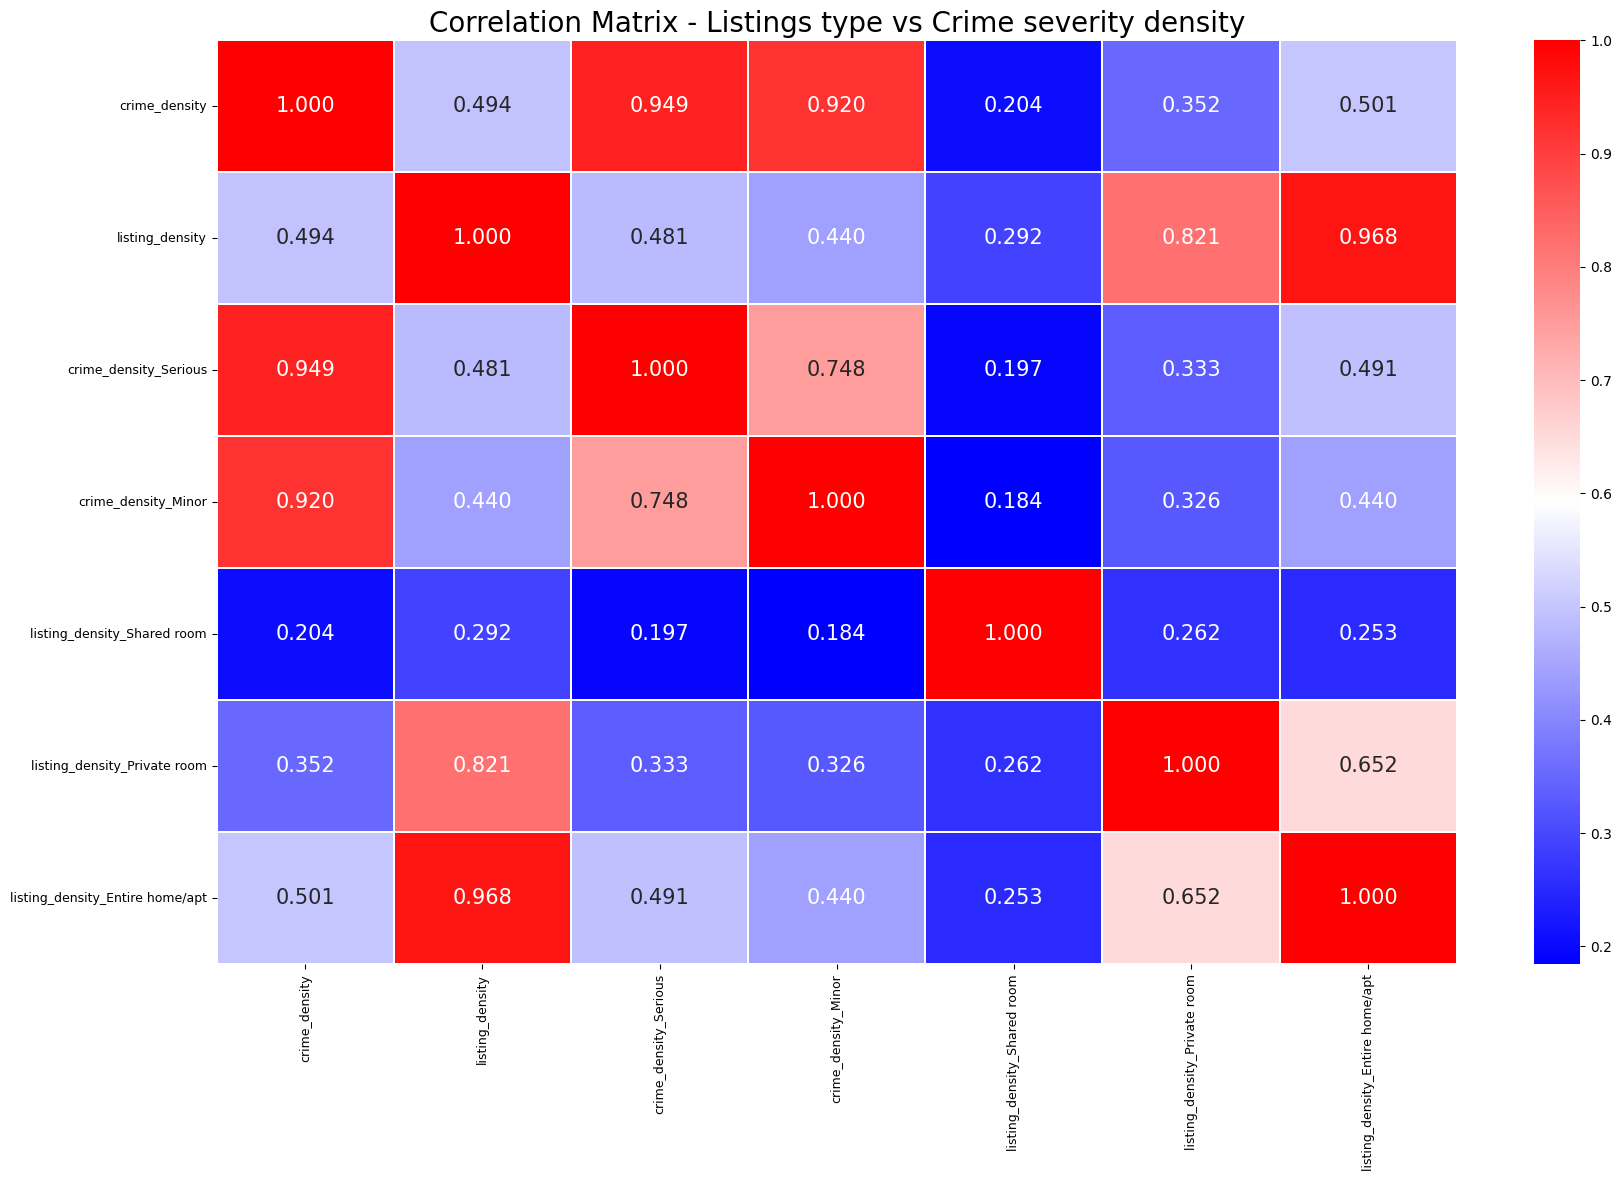

In [83]:
# make the correlation matrix
lsoa_merge1_sub2 = lsoa_merge1.iloc[:,-7:]
lsoa_merge1_sub_comatrix = lsoa_merge1_sub2.corr()
### plot the correlation matrix plot
# cor = df_cormatrix.sort_values(by='fires', ascending=False)
fig, axes = plt.subplots(figsize = (20,12))
sns.heatmap(lsoa_merge1_sub_comatrix, cmap ='bwr', annot = True, fmt='.3f', linewidths = 0.1, annot_kws = {'size': 15}, ax = axes)
axes.tick_params(labelsize = 9)
axes.set_title('Correlation Matrix - Listings type vs Crime severity density', fontsize = 20)
plt.show()

 Avoid multicollinear

In [53]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [55]:
lsoa_merge2 = lsoa_merge1.loc[:,['crime_density','listing_density_Shared room', 'listing_density_Private room', 'listing_density_Entire home/apt']]
lsoa_merge1_VIF = drop_column_using_vif_(lsoa_merge1.drop('crime_density',axis=1))
print("The columns remaining after VIF selection are:")
print(lsoa_merge1_VIF.columns)
lsoa_merge1_VIF.head()

The columns remaining after VIF selection are:
Index(['listing_density_Shared room', 'listing_density_Private room',
       'listing_density_Entire home/apt'],
      dtype='object')


listing_density_Shared room  listing_density_Private room  \
0                     0.000679                      0.003394   
1                     0.000000                      0.000000   
2                     0.000000                      0.002480   
3                     0.000000                      0.018002   
4                     0.000000                      0.003261   

   listing_density_Entire home/apt  
0                         0.006789  
1                         0.010130  
2                         0.007440  
3                         0.071107  
4                         0.000543

# OSL

In [87]:
import statsmodels.api as sm
model = sm.OLS(endog=lsoa_merge1[['crime_density']], exog=sm.add_constant(lsoa_merge1_VIF)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          crime_density   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     577.2
Date:                Fri, 08 Dec 2023   Prob (F-statistic):          4.50e-322
Time:                        17:18:20   Log-Likelihood:                 15492.
No. Observations:                4994   AIC:                        -3.098e+04
Df Residuals:                    4990   BIC:                        -3.095e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0054      0.000     26.823      0.000       0.005       0.006
listing_density_Shared room         4.6813      0.749      6.247      0.000       3.212       6.150
listing_density_Private room        0.0926      0.048      1.944      0.052      -0.001       0.186
listing_density_Entire home/apt     0.5902      0.021     28.407      0.000       0.549       0.631
==============================================================================
Omnibus:                     7699.951   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7588886.765
Skew:                           9.367   Prob(JB):                         0.00
Kurtosis:                     193.051   Cond. No.                     4.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Residual analysis

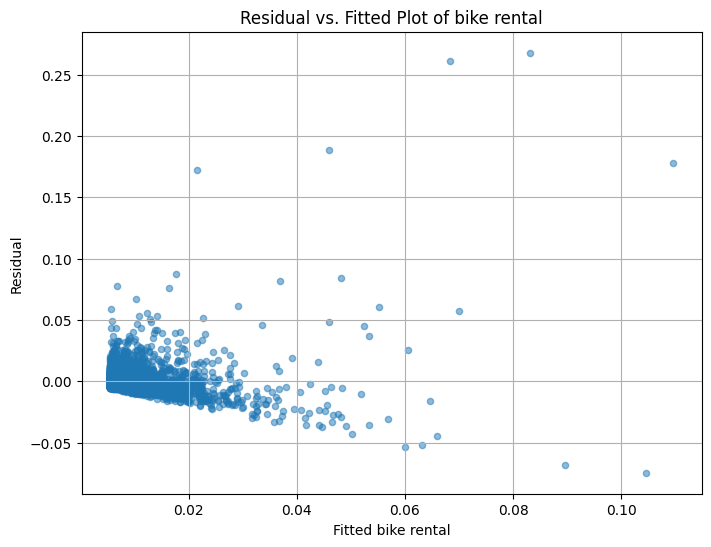

In [89]:
# Residuals vs. Fitted plot

# Set the figure size
plt.figure(figsize=(8, 6))  
# alpha = 0.5: controlling the transparency of the markers. Here alpha = 0.5 means that the markers are semi-transparent.
# s = 20: controlling the size of the markers. The default value is plt.rcParams['lines.markersize'] ** 2. Here we set it as 20.
# To get the default value of marker size, run the following line
# print(plt.rcParams['lines.markersize'] ** 2) 
plt.scatter(model.fittedvalues, model.resid, alpha = 0.5, s=20)
# plt.scatter(model_bike_rental.fittedvalues, model_bike_rental.resid, alpha = 0.5)
# adding title and labels
plt.xlabel('Fitted bike rental')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of bike rental')
# Adding grid lines
plt.grid(True)
plt.show()

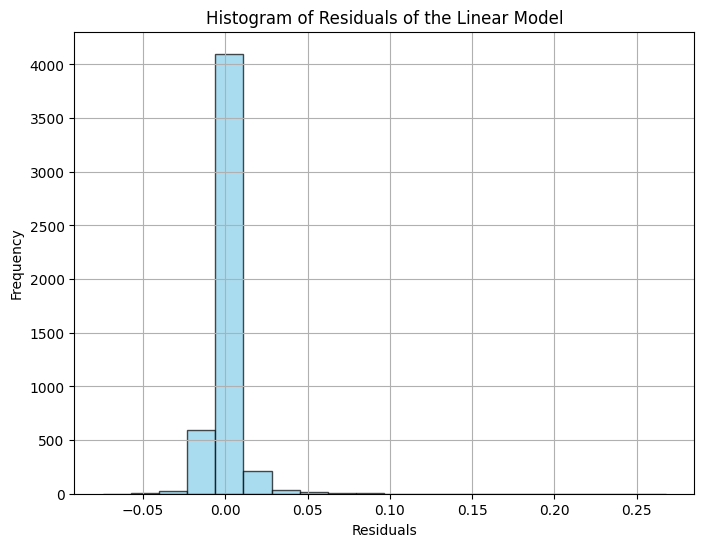

In [90]:
# Histogram of residuals

# Set the figure size
plt.figure(figsize=(8, 6))  

# Plotting the histogram
plt.hist(model.resid, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of the Linear Model')

# Adding grid lines (optional)
plt.grid(True)

# Display the plot
plt.show()

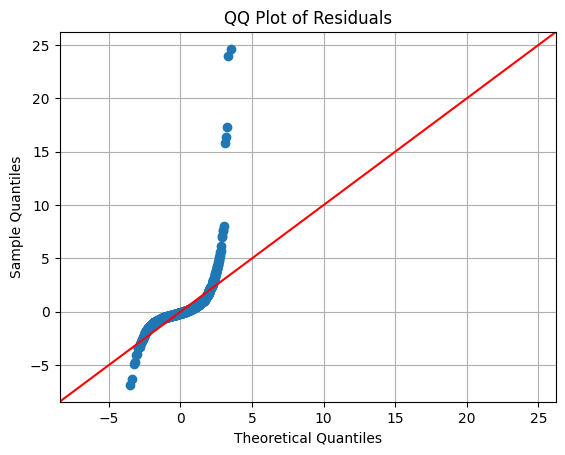

In [91]:
# (optional) the QQ plot of residuals
# More details: https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html
fig = sm.qqplot(model.resid, fit=True, line="45")
plt.title('QQ Plot of Residuals')

# Adding grid lines (optional)
plt.grid(True)

# Display the plot
plt.show()

## Discussion of the four conditions 

- Linear relationship

The points in the residual plot do not bounce randomly around the x axis (residual=0). Therefore, it looks like ther is no linear relationship between the variables.

- Independent errors

The points in the residual plot are not randomly distributed and some clusters/patterns can be seens. Therefore, it is unlikely that the errors are independently distributed.

- Normally distributed errors

The histogram is asymmetric ans shows a positive skew, with more data points clustered to the right of residual=0.

The QQ plot shows that the residuals deviates from the theoretical quantiles when the residual value is very small or large.

Therefore, it is not likely that the residuals are normally distributed.

- Equal variance

The points do not form a horizontal band around residual=0, and the range of residuals increases with the fitted y value. Therefore, it is unlikely that the residuals have equal variance.


## Statistical tests of the four conditions

### Linear relationship

In [93]:
import statsmodels
test_fires = statsmodels.stats.diagnostic.linear_rainbow(model)
# This function returns a tuple consisting of two values: the test statistic based on the F test and the pvalue of the test
# Note that these two values are not named. Therefore, you need to know the order before accessing these two values.
print("The p value of the fires test: {:.4f}".format(test_fires[1]))

The p value of the fires test: 0.0000


As the p value is less than 0.05, we will reject the null hypothesis. This dataset and model does not meet the linear relationship condition.

### Independent errors

We will use the Durbin-Watson test and and Ljung-Box test for testing the independent errors. 

This test assumes that there is no serial correlation in the residuals. 

This statistic will always be between 0 and 4. 

If there is no serial correlation, the test statistic equals 2. 

The closer to 0, the more evidence for positive serial correlation. 

The closer to 4, the more evidence for negative serial correlation. 

Empirically, if the test statistic is between 1 and 2, it is likely that there is no serial correlation in the residuals.

In [94]:
test_dw = statsmodels.stats.stattools.durbin_watson(model.resid)
print("Durbin-Watson test statistic is: {:.4f}".format(test_dw))

Durbin-Watson test statistic is: 1.6682


demonstrates that there might be serial correlation in this model and the residuals are not independently distributed.

### Normally distributed errors

We will use the Jarque-Bera test for testing the normality of residuals. 

The null hypothesis of this test is that the data is normally distributed.


In [95]:
test_JB = statsmodels.stats.stattools.jarque_bera(model.resid)
print("The p value of the Jarque Bera test: {:.4f}".format(test_JB[1]))

The p value of the Jarque Bera test: 0.0000


As the p value is less than 0.05, we will reject the null hypothesis and conclude that the residuals are not normally distributed.

# The Spatial Lag model

Moran’s I shows spatial autocorrelation

In [102]:
import pandas as pd
from libpysal.cg import KDTree, RADIUS_EARTH_MILES
from libpysal.weights import KNN
from spreg import ML_Lag

X = lsoa_merge1[['listing_density_Shared room', 'listing_density_Private room', 'listing_density_Entire home/apt']].to_numpy()
y = lsoa_merge1['crime_density'].to_numpy()
# Extract the centroids of the polygons
centroids = lsoa_merge1['geometry'].centroid

# Create a KDTree using the centroids
tree = KDTree(data=list(zip(centroids.x, centroids.y)),
              distance_metric='arc', radius=RADIUS_EARTH_MILES)

# Create a KNN weights matrix
nn = KNN(tree, k=5)



mod = ML_Lag(
    y=y,
    x=X,
    w=nn,
    name_y='crime_density',
    name_x=['listing_density_Shared room', 'listing_density_Private room', 'listing_density_Entire home/apt']
)

# results


print(mod.summary)

c:\Users\17197\AppData\Local\Programs\Python\Python311\Lib\site-packages\spreg\ml_lag.py:634: RuntimeWarning: divide by zero encountered in log
  jacob = np.log(np.linalg.det(a))
c:\Users\17197\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_optimize.py:2306: RuntimeWarning: invalid value encountered in multiply
  q = (xf - fulc) * (fx - fnfc)
c:\Users\17197\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_optimize.py:2307: RuntimeWarning: invalid value encountered in subtract
  p = (xf - fulc) * q - (xf - nfc) * r


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :crime_density                Number of Observations:        4994
Mean dependent var  :      0.0094                Number of Variables   :           5
S.D. dependent var  :      0.0126                Degrees of Freedom    :        4989
Pseudo R-squared    :      0.2578
Spatial Pseudo R-squared:  0.2577
Log likelihood      :  15492.4157
Sigma-square ML     :      0.0001                Akaike info criterion :  -30974.831
S.E of regression   :      0.0109                Schwarz criterion     :  -30942.252

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
--------------------------------------------------------------